In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/features/preprocess/preprocess.gzip.parquet'

df = pd.read_parquet(url)

df

,frame_index,blur,total_objects,median_motion,std_motion,features,red,orange,yellow,green,blue,purple,white,black,brown
0,0.0,166.639314,128,NaN,NaN,None,0.004964,0.032175,0.013519,0.003435,0.077371,0.000050,0.037876,0.039811,0.343644
1,1.0,137.255737,129,-3.811660e-12,5.773012,None,0.005425,0.031148,0.013262,0.003967,0.078179,0.000034,0.037785,0.040975,0.346251
2,2.0,129.215376,143,4.419556e-03,5.275668,None,0.005206,0.030064,0.012403,0.004012,0.076630,0.000049,0.043622,0.041968,0.341993
3,3.0,120.201082,167,-5.203282e-14,4.969699,None,0.005676,0.029279,0.012569,0.004323,0.078527,0.000081,0.044171,0.043968,0.342615
4,4.0,115.396284,150,-9.819682e-13,4.699063,None,0.005380,0.026098,0.013278,0.004598,0.080849,0.000065,0.045038,0.046263,0.341912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4048,4048.0,27.454589,86,-3.692795e-04,4.255781,None,0.049126,0.266886,0.011898,0.025254,0.203703,0.000325,0.014895,0.004985,0.473459
4049,4049.0,26.836729,71,1.362175e-04,3.779635,None,0.053435,0.258299,0.020805,0.018349,0.231993,0.000044,0.018138,0.004850,0.425330
4050,4050.0,27.206008,56,1.343809e-03,3.423098,None,0.048822,0.268829,0.030527,0.017871,0.229372,0.000014,0.018835,0.009926,0.440023
4051,4051.0,27.293872,82,1.087740e-03,4.086150,b'\x00\x00\x00\x00\xcc\r\x84>e\x8e\x96?\x00\x0...,0.049648,0.288490,0.036383,0.024814,0.192460,0.000010,0.020039,0.009279,0.452798


/tmp/ipykernel_19708/1163922947.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = fdf.corr()


([<matplotlib.axis.YTick at 0x7f6b36aef5e0>,
 [Text(0, 0, 'blur'),
  Text(0, 1, 'total_objects'),
  Text(0, 2, 'median_motion'),
  Text(0, 3, 'std_motion'),
  Text(0, 4, 'red'),
  Text(0, 5, 'orange'),
  Text(0, 6, 'yellow'),
  Text(0, 7, 'green'),
  Text(0, 8, 'blue'),
  Text(0, 9, 'purple'),
  Text(0, 10, 'white'),
  Text(0, 11, 'black'),
  Text(0, 12, 'brown')])

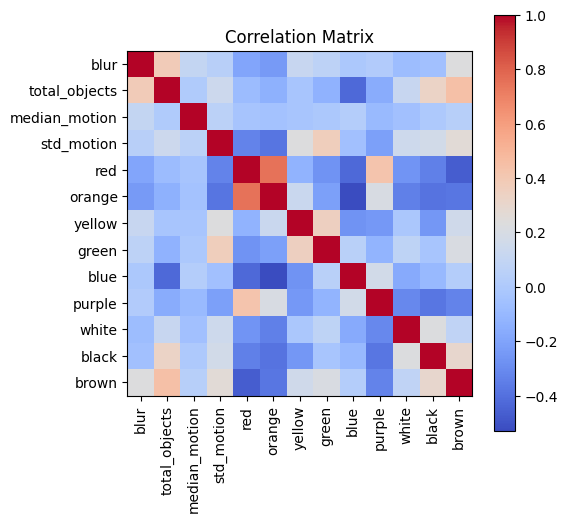

In [3]:
# confusion matrix
fdf = df[[col for col in df.columns if col != 'frame_index']]

# plot correlation matrix
corr = fdf.corr()

plt.figure(figsize=(5, 5))
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()

# remove grid
plt.grid(False)

# show labels
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns, rotation=0)